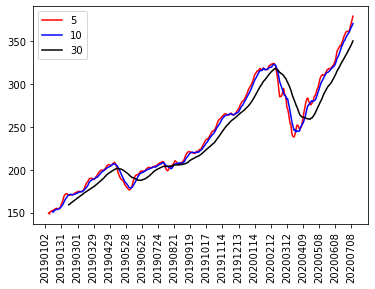

In [1]:
# 第一问

import tushare as ts
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num
import pandas as pd
import numpy as np

pro = ts.pro_api()

df = pro.us_daily(ts_code='AAPL', start_date='20190101')
df = df.sort_values(by='trade_date', ascending=True)
df['trade_date2'] = df['trade_date'].copy()
df['trade_date'] = pd.to_datetime(df['trade_date']).map(date2num)
df['dates'] = np.arange(0, len(df))

for ma in [5,10,30]:
    df[str(ma)] = df.close.rolling(ma).mean()

x= df.dates
x_ticks_label = df.trade_date2

plt.plot(df[['dates']],df['5'],color='red',label='5')
plt.plot(df[['dates']],df['10'],color='blue',label='10')
plt.plot(df[['dates']],df['30'],color='black',label='30')
plt.xticks(x[::20],x_ticks_label[::20],rotation=90)
plt.legend()
plt.show()

c:\python\python38\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


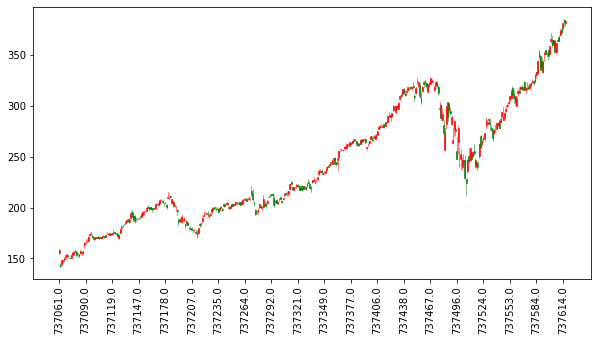

In [2]:
# 第二问

import tushare as ts
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num
import pandas as pd
import numpy as np
import mpl_finance

pro = ts.pro_api()

# df = pro.us_daily(ts_code='AAPL', start_date='20190101')
df = df.sort_values(by='trade_date', ascending=True)
df['trade_date2'] = df['trade_date'].copy()
df['trade_date'] = pd.to_datetime(df['trade_date']).map(date2num)
df['dates'] = np.arange(0, len(df))

fig, ax = plt.subplots(figsize=(10,5))

mpl_finance.candlestick_ochl(
    ax=ax,
    quotes=df[['dates', 'open', 'close', 'high', 'low']].values,
    width=0.7,
    colorup='r',
    colordown='g',
    alpha=0.7)

x= df.dates
x_ticks_label = df.trade_date2
plt.xticks(x[::20],x_ticks_label[::20],rotation=90)
plt.show()

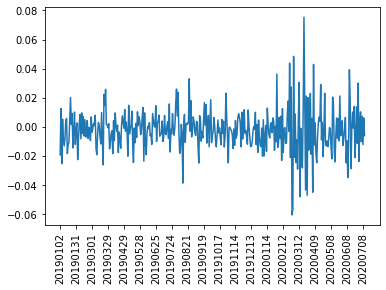

In [4]:
# 第三问

import tushare as ts
import matplotlib.pyplot as plt
import math

pro = ts.pro_api()

#获取单一股票行情
df = pro.us_daily(ts_code='AAPL', start_date='20190101')
df = df.sort_values(by='trade_date', ascending=True)

df['rate_log'] = df.apply(lambda x: math.log((x['open'] / x['close']),math.e), axis=1)

x = df.trade_date
y = df.rate_log

plt.plot(x,y)
plt.xticks(x[::20],rotation=90)
plt.show()

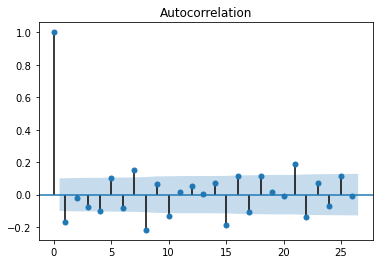

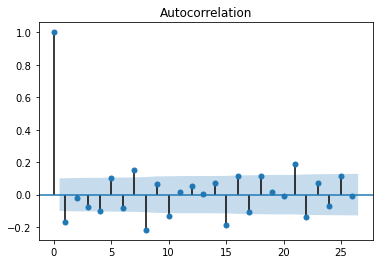

In [5]:
# 第四问

import tushare as ts
import math
from statsmodels.graphics.tsaplots import plot_acf

pro = ts.pro_api()

#获取单一股票行情
df = pro.us_daily(ts_code='AAPL', start_date='20190101')
df = df.sort_values(by='trade_date', ascending=True)

df['rate_log'] = df.apply(lambda x: math.log((x['open'] / x['close']),math.e), axis=1)

plot_acf(df['rate_log'])

